In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "/content/drive/MyDrive/LG_data/DESAFIO04/product_quality_dataset.csv")
data = pd.read_csv(path_file, header=0)

data.head()

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Type,Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,0,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,1,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,1,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,1,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,0,84


In [ ]:
data.isnull().sum()

,0
Power Consumption (kW),0
Cooling Capacity (BTU),0
Noise Level (dB),0
EER,0
Temperature Range (°C),0
Airflow (m³/min),0
Warranty (Years),0
Build Quality Rating,0
Maintenance Cost ($),0
Type,0


<function matplotlib.pyplot.show(close=None, block=None)>

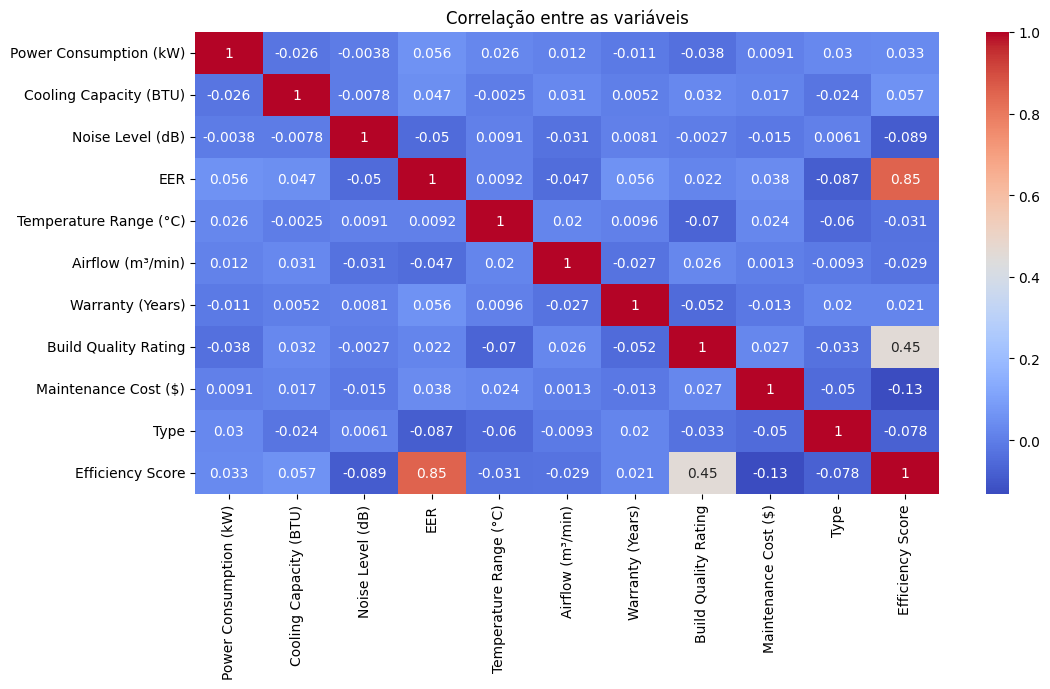

In [ ]:
# Correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlação entre as variáveis')
plt.show

In [ ]:
# Splitting the data
X = data.drop('Type', axis=1)
X

,Power Consumption (kW),Cooling Capacity (BTU),Noise Level (dB),EER,Temperature Range (°C),Airflow (m³/min),Warranty (Years),Build Quality Rating,Maintenance Cost ($),Efficiency Score
0,2.87,24000,47.39,3.55,20,9.20,3,10,188,96
1,5.75,18000,44.66,3.28,30,12.01,5,6,297,77
2,4.66,30000,46.25,3.82,30,29.23,6,5,381,83
3,3.99,9000,40.67,2.72,18,17.42,3,9,299,75
4,1.78,30000,57.23,3.77,30,21.90,3,3,198,84
...,...,...,...,...,...,...,...,...,...,...
995,1.46,12000,47.03,3.90,30,10.13,2,10,265,100
996,5.59,24000,57.44,3.32,15,9.41,6,9,290,82
997,1.68,30000,51.86,3.62,18,21.04,6,3,274,79
998,5.75,24000,38.42,4.39,25,26.15,6,2,100,94


In [ ]:
# Target variable
y = data['Type']
y

,Type
0,0
1,1
2,1
3,1
4,0
...,...
995,1
996,1
997,0
998,0


In [ ]:
# # Train and test split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.model_selection import train_test_split

# Primeiro, separe 20% dos dados para o conjunto de teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Em seguida, separe 25% dos dados restantes para o conjunto de validação
# Isso resulta em 20% do total original (0.25 * 0.8 = 0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=0)

In [ ]:
# Imprimir as formas dos conjuntos de dados
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (490, 10)
X_val shape: (210, 10)
X_test shape: (300, 10)
y_train shape: (490,)
y_val shape: (210,)
y_test shape: (300,)


In [ ]:
# Transforming y values into binary values from the median
import numpy as np

threshold = y.median()
y_train_bin = np.where(y_train > threshold, 1, 0)
y_val_bin = np.where(y_val > threshold, 1, 0)
y_test_bin = np.where(y_test > threshold, 1, 0)

In [ ]:
# Logistic Regression model training
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train_bin)

LogisticRegression(max_iter=10000)

In [ ]:
# Predictions
y_pred = log_model.predict(X_test)
y_pred_val = log_model.predict(X_val)
y_pred_train = log_model.predict(X_train)

In [ ]:
# Accuracy test
from sklearn.metrics import accuracy_score

y_train_bin = np.where(y_train > threshold, 1, 0)
accuracy_train = accuracy_score(y_train_bin, y_pred_train)
print('Acurácia (Regressão Logística) - Treino:', accuracy_train)

y_val_bin = np.where(y_val > threshold, 1, 0)
accuracy_val = accuracy_score(y_val_bin, y_pred_val)
print('Acurácia (Regressão Logística) - Validação:', accuracy_val)

y_test_bin = np.where(y_test > threshold, 1, 0)
accuracy = accuracy_score(y_test_bin, y_pred)
print('Acurácia (Regressão Logística)- Teste', accuracy)

Acurácia (Regressão Logística) - Treino: 0.5979591836734693
Acurácia (Regressão Logística) - Validação: 0.5380952380952381
Acurácia (Regressão Logística)- Teste 0.5166666666666667


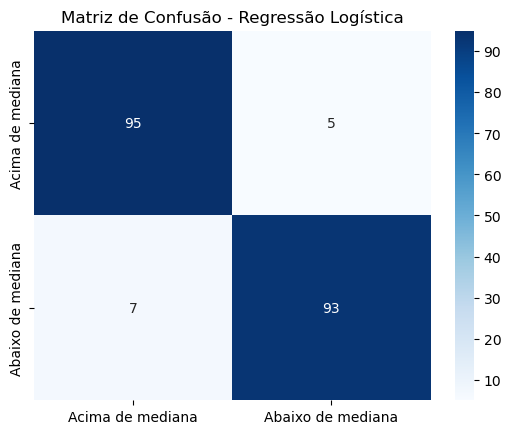

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_bin, y_pred)
class_labels = ['Acima de mediana', 'Abaixo de mediana']
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
# Cross-validation com 5 folds
scores = cross_val_score(log_model, X_train_val, y_train_val, cv=5, scoring='accuracy')

# Resultados
print("Acurácias dos folds:", scores)
print("Acurácia média (5 folds):", np.mean(scores))

Acurácias dos folds: [0.51428571 0.5        0.52142857 0.51428571 0.53571429]
Acurácia média (5 folds): 0.5171428571428571


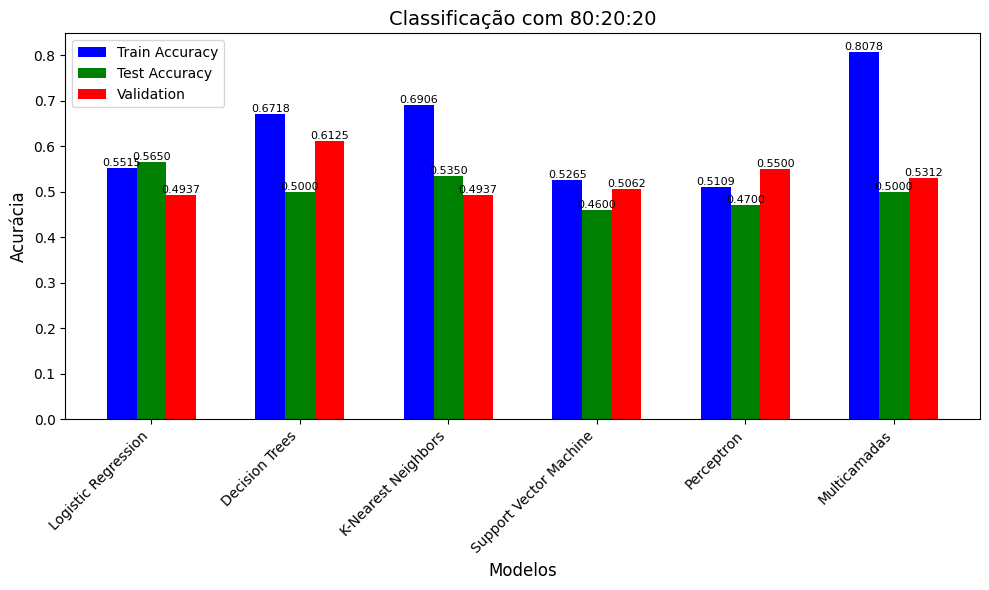

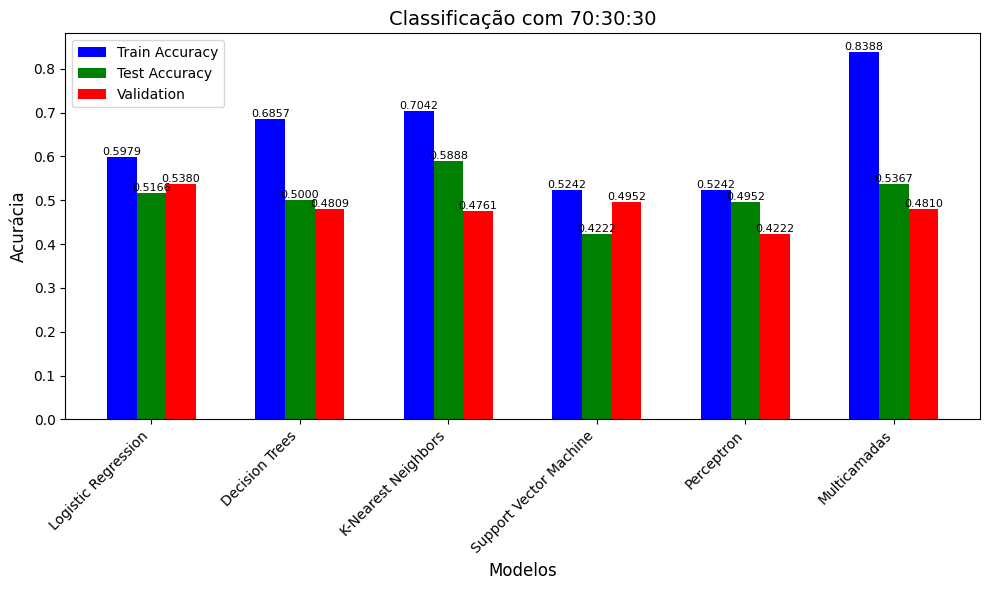

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Dados extraídos da tabela
data_80_20 = {
    'Model': [
        'Logistic Regression', 'Decision Trees',
        'K-Nearest Neighbors', 'Support Vector Machine',
        'Perceptron', 'Multicamadas'
    ],
    'Train Accuracy': [0.5515, 0.6718, 0.6906, 0.5265, 0.5109, 0.8078],
    'Test Accuracy': [0.565, 0.5, 0.535, 0.46, 0.47, 0.5],
    'Validation': [0.4937, 0.6125, 0.4937, 0.5062, 0.55, 0.5312]
}

data_70_30 = {
    'Model': [
        'Logistic Regression', 'Decision Trees',
        'K-Nearest Neighbors', 'Support Vector Machine',
        'Perceptron', 'Multicamadas'
    ],
    'Train Accuracy': [0.5979, 0.6857, 0.7042, 0.5242, 0.5242, 0.8388],
    'Test Accuracy': [0.5166, 0.5, 0.5888, 0.4222, 0.4952, 0.5367],
    'Validation': [0.538, 0.4809, 0.4761, 0.4952, 0.4222, 0.4810]
}

# Convertendo para DataFrame
df_80_20 = pd.DataFrame(data_80_20)
df_70_30 = pd.DataFrame(data_70_30)

# Função para plotar os gráficos
def plot_metrics(data, title):
    x = data['Model']
    bar_width = 0.2
    fig, ax = plt.subplots(figsize=(10, 6))

    # Posições das barras
    r1 = range(len(x))
    r2 = [r + bar_width for r in r1]
    r3 = [r + bar_width for r in r2]

    # Plotando as barras
    ax.bar(r1, data['Train Accuracy'], width=bar_width, label='Train Accuracy', color='b')
    ax.bar(r2, data['Test Accuracy'], width=bar_width, label='Test Accuracy', color='g')
    ax.bar(r3, data['Validation'], width=bar_width, label='Validation', color='r')

    # Adicionando os valores de acurácia em cima das barras
    for i, v in enumerate(data['Train Accuracy']):
        ax.text(r1[i], v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
    for i, v in enumerate(data['Test Accuracy']):
        ax.text(r2[i], v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)
    for i, v in enumerate(data['Validation']):
        ax.text(r3[i], v, f"{v:.4f}", ha='center', va='bottom', fontsize=8)

    # Adicionando detalhes
    ax.set_xlabel('Modelos', fontsize=12)
    ax.set_ylabel('Acurácia', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.set_xticks([r + bar_width for r in range(len(x))])
    ax.set_xticklabels(x, rotation=45, ha='right')
    ax.legend()
    plt.tight_layout()
    plt.show()

# Plotando os gráficos
plot_metrics(df_80_20, 'Classificação com 80:20:20')
plot_metrics(df_70_30, 'Classificação com 70:30:30')



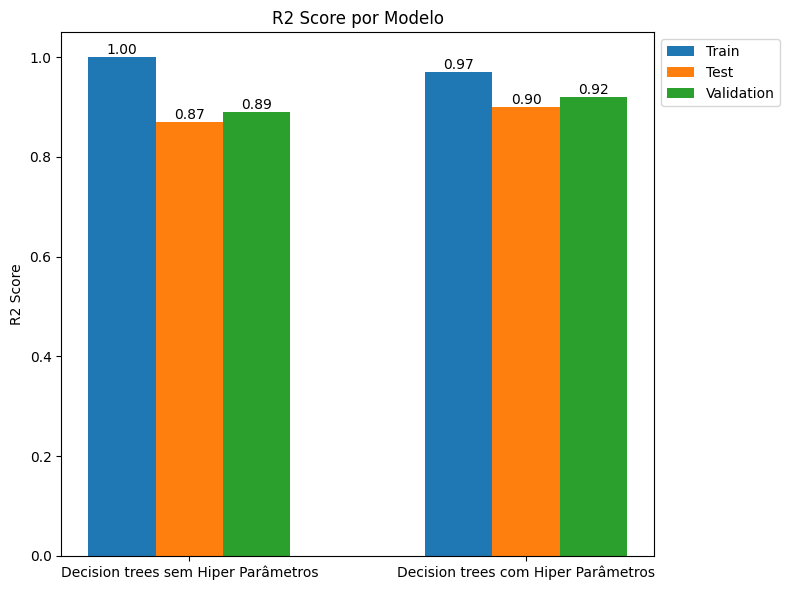

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Dados da tabela
models = ['Decision trees sem Hiper Parâmetros', 'Decision trees com Hiper Parâmetros']
r2_scores_train = [1.00, 0.97]
r2_scores_test = [0.87, 0.90]
r2_scores_val = [0.89, 0.92]

x = np.arange(len(models))  # Posições para as barras
width = 0.2  # Largura das barras

plt.figure(figsize=(8, 6))

# Criando as barras para cada conjunto de dados
bars_train = plt.bar(x - width, r2_scores_train, width, label='Train')
bars_test = plt.bar(x, r2_scores_test, width, label='Test')
bars_val = plt.bar(x + width, r2_scores_val, width, label='Validation')

# Adicionando os valores sobre as barras
for bar in bars_train:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)
for bar in bars_test:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)
for bar in bars_val:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

# Ajustando a posição dos rótulos do eixo X
plt.xticks(x, models)

# Definindo o título e os rótulos dos eixos
plt.ylabel('R2 Score')
plt.title('R2 Score por Modelo')

# Exibindo a legenda fora do gráfico, à direita
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()  # Ajuste para não cortar nada do gráfico
plt.show()
